In [13]:
import pandas as pd

# Load the dataset
file_path = "netflix_data.csv"
netflix_data = pd.read_csv(file_path)

# Show the first few rows and column names
netflix_data.head(), netflix_data.columns


(  show_id     type                  title         director  \
 0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
 1      s2  TV Show          Blood & Water              NaN   
 2      s3  TV Show              Ganglands  Julien Leclercq   
 3      s4  TV Show  Jailbirds New Orleans              NaN   
 4      s5  TV Show           Kota Factory              NaN   
 
                                                 cast        country  \
 0                                                NaN  United States   
 1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
 2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
 3                                                NaN            NaN   
 4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
 
            date_added  release_year rating   duration  \
 0  September 25, 2021          2020  PG-13     90 min   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 2  Septembe

In [17]:
# Shape of the dataset
shape = netflix_data.shape

# Check for missing values
null_summary = netflix_data.isnull().sum()

# Data types
dtypes = netflix_data.dtypes

shape, null_summary, dtypes


((8807, 12),
 show_id            0
 type               0
 title              0
 director        2634
 cast             825
 country          831
 date_added        10
 release_year       0
 rating             4
 duration           3
 listed_in          0
 description        0
 dtype: int64,
 show_id         object
 type            object
 title           object
 director        object
 cast            object
 country         object
 date_added      object
 release_year     int64
 rating          object
 duration        object
 listed_in       object
 description     object
 dtype: object)

In [19]:
# Drop rows with missing values in key columns
columns_to_check = ['director', 'cast', 'country', 'date_added', 'rating', 'duration']
netflix_cleaned = netflix_data.dropna(subset=columns_to_check)

# Show new shape and confirm missing values
new_shape = netflix_cleaned.shape
nulls_after_drop = netflix_cleaned.isnull().sum()

new_shape, nulls_after_drop


((5332, 12),
 show_id         0
 type            0
 title           0
 director        0
 cast            0
 country         0
 date_added      0
 release_year    0
 rating          0
 duration        0
 listed_in       0
 description     0
 dtype: int64)

In [21]:
# Strip whitespace from raw string version of 'date_added'
netflix_cleaned['date_added'] = netflix_data.loc[netflix_cleaned.index, 'date_added'].str.strip()

# Safely convert to datetime without specifying format
netflix_cleaned['date_added'] = pd.to_datetime(netflix_cleaned['date_added'], errors='coerce')

# Extract features only from valid datetime entries
netflix_cleaned['added_year'] = netflix_cleaned['date_added'].dt.year
netflix_cleaned['added_month'] = netflix_cleaned['date_added'].dt.month
netflix_cleaned['added_dayofweek'] = netflix_cleaned['date_added'].dt.day_name()

# Preview the result
netflix_cleaned[['date_added', 'added_year', 'added_month', 'added_dayofweek']].head()


/var/folders/wx/72zxv_dj0pqggcyp53w74n640000gn/T/ipykernel_89228/52830841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_cleaned['date_added'] = netflix_data.loc[netflix_cleaned.index, 'date_added'].str.strip()
/var/folders/wx/72zxv_dj0pqggcyp53w74n640000gn/T/ipykernel_89228/52830841.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_cleaned['date_added'] = pd.to_datetime(netflix_cleaned['date_added'], errors='coerce')
/var/folders/wx/72zxv_dj0pqggcyp53w74n640000gn/T/ipykernel_89228/52

,date_added,added_year,added_month,added_dayofweek
7,2021-09-24,2021,9,Friday
8,2021-09-24,2021,9,Friday
9,2021-09-24,2021,9,Friday
12,2021-09-23,2021,9,Thursday
24,2021-09-21,2021,9,Tuesday


In [23]:
# Split 'duration' into number and unit
duration_split = netflix_cleaned['duration'].str.extract(r'(\d+)\s*(\w+)')

# Convert duration number to integer
netflix_cleaned['duration_int'] = duration_split[0].astype(int)
netflix_cleaned['duration_type'] = duration_split[1]

# Preview the new columns
netflix_cleaned[['duration', 'duration_int', 'duration_type']].head()


/var/folders/wx/72zxv_dj0pqggcyp53w74n640000gn/T/ipykernel_89228/1241963427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_cleaned['duration_int'] = duration_split[0].astype(int)
/var/folders/wx/72zxv_dj0pqggcyp53w74n640000gn/T/ipykernel_89228/1241963427.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_cleaned['duration_type'] = duration_split[1]


,duration,duration_int,duration_type
7,125 min,125,min
8,9 Seasons,9,Seasons
9,104 min,104,min
12,127 min,127,min
24,166 min,166,min


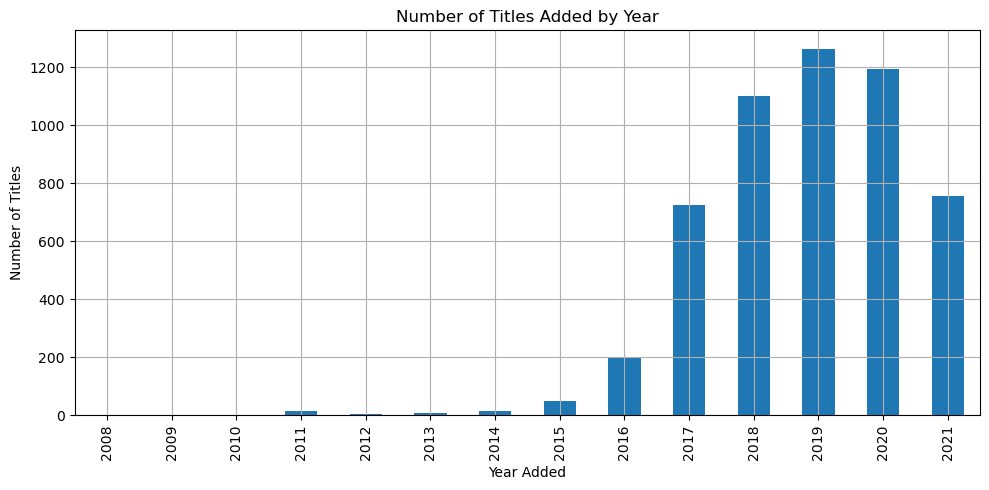

In [25]:
import matplotlib.pyplot as plt

# Plot 1: Content count by year
plt.figure(figsize=(10, 5))
netflix_cleaned['added_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Titles Added by Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()


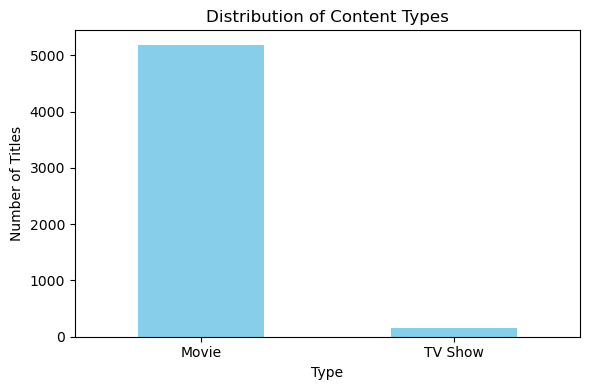

In [26]:
# Plot 2: Content Type Distribution (Movies vs TV Shows)
plt.figure(figsize=(6, 4))
netflix_cleaned['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


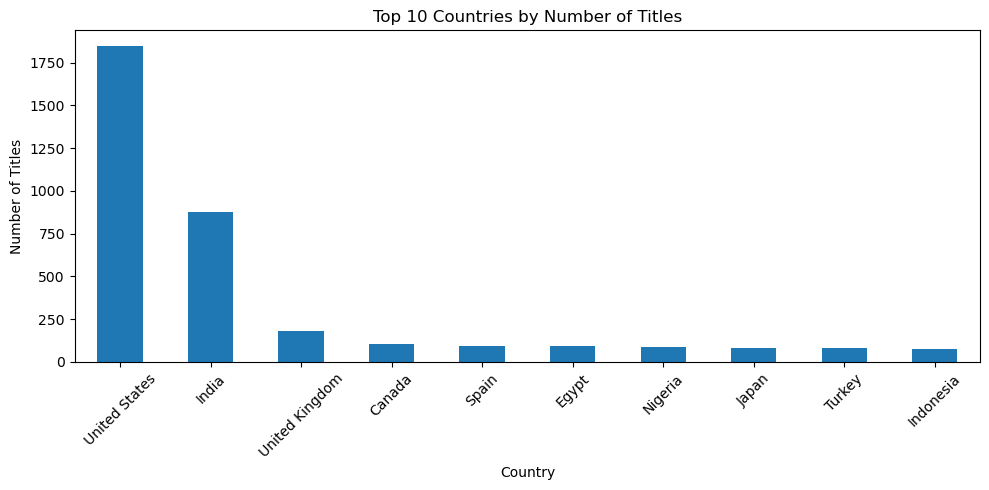

In [28]:
# Plot 3: Top 10 Countries by Number of Titles
plt.figure(figsize=(10, 5))
netflix_cleaned['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


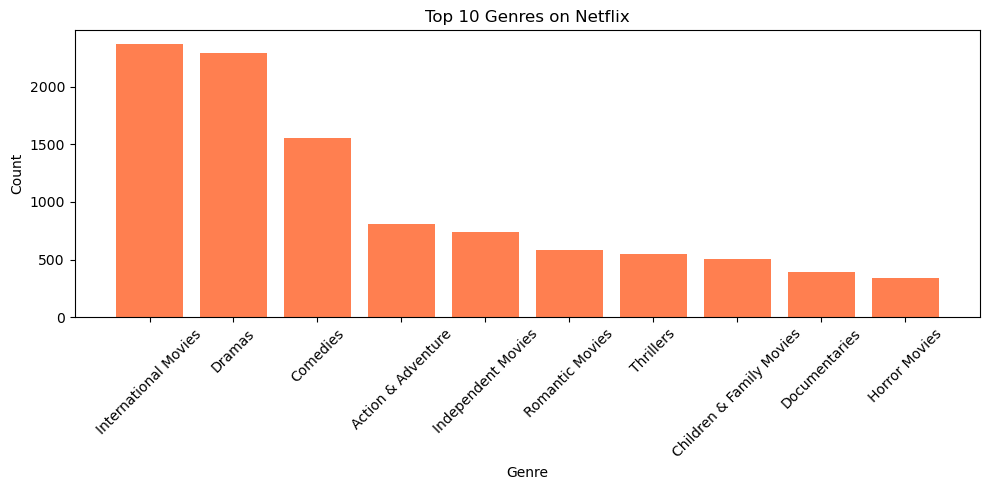

In [31]:
# Split genres and count frequency
from collections import Counter

# Flatten all genres into a list
genre_series = netflix_cleaned['listed_in'].str.split(', ')
all_genres = [genre for sublist in genre_series for genre in sublist]

# Count top 10 genres
genre_counts = Counter(all_genres).most_common(10)

# Unpack for plotting
genres, counts = zip(*genre_counts)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(genres, counts, color='coral')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning to description column
netflix_cleaned['clean_description'] = netflix_cleaned['description'].apply(clean_text)

# Show original vs cleaned description
netflix_cleaned[['description', 'clean_description']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shaharyaarkutchi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/wx/72zxv_dj0pqggcyp53w74n640000gn/T/ipykernel_89228/1235954113.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_cleaned['clean_description'] = netflix_cleaned['description'].apply(clean_text)


,description,clean_description
7,"On a photo shoot in Ghana, an American model s...",photo shoot ghana american model slips back ti...
8,A talented batch of amateur bakers face off in...,talented batch amateur bakers face week compet...
9,A woman adjusting to life after a loss contend...,woman adjusting life loss contends feisty bird...
12,After most of her family is murdered in a terr...,family murdered terrorist bombing young woman ...
24,When the father of the man she loves insists t...,father man loves insists twin sons marry twin ...


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: TF-IDF on clean_description
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_cleaned['clean_description'])

# Step 2: Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 3: Create index lookup
title_to_index = pd.Series(netflix_cleaned.index, index=netflix_cleaned['title']).drop_duplicates()

# Step 4: Recommendation function
def recommend_movies(title, num_recommendations=5):
    if title not in title_to_index:
        return f"❌ '{title}' not found in the dataset."
    
    idx = title_to_index[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    recommended_indices = [i[0] for i in sim_scores]
    
    return netflix_cleaned['title'].iloc[recommended_indices].tolist(), sim_scores


In [35]:
# Show 10 random available titles from the cleaned dataset
available_titles = netflix_cleaned['title'].drop_duplicates().sample(10, random_state=42).tolist()
available_titles


['Aiyyaa',
 'The Haunting of Molly Hartley',
 'Postcards from London',
 'Ne Zha',
 'The Edge of Seventeen',
 'Zenda',
 'Trevor Noah: Afraid of the Dark',
 'Harishchandrachi Factory',
 'Monster Island',
 'Bygones Be Bygones']

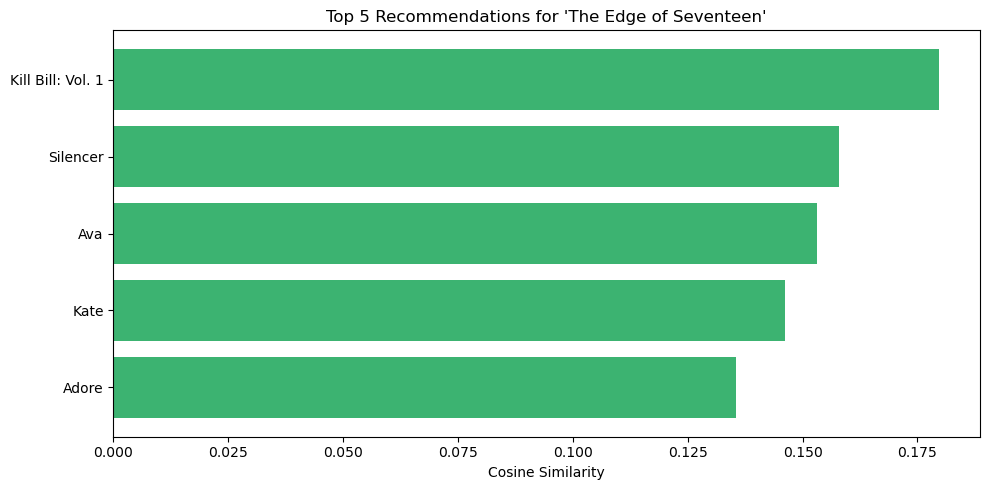

Recommended Titles:
 ['Kill Bill: Vol. 1', 'Silencer', 'Ava', 'Kate', 'Adore']


In [36]:
# Step 5: View recommendations and graph for a selected title
selected_title = "The Edge of Seventeen"
recommended_titles, top_sim_scores = recommend_movies(selected_title, 5)

# Extract scores and titles
scores = [score for i, score in top_sim_scores]
titles = netflix_cleaned['title'].iloc[[i for i, score in top_sim_scores]].tolist()

# Plot similarity scores
plt.figure(figsize=(10, 5))
plt.barh(titles, scores, color='mediumseagreen')
plt.xlabel('Cosine Similarity')
plt.title(f"Top 5 Recommendations for '{selected_title}'")
plt.gca().invert_yaxis()  # Put highest score at top
plt.tight_layout()
plt.show()

# Output titles
print("Recommended Titles:\n", recommended_titles)

/var/folders/wx/72zxv_dj0pqggcyp53w74n640000gn/T/ipykernel_89228/3274153011.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_cleaned['combined_text'] = (
/var/folders/wx/72zxv_dj0pqggcyp53w74n640000gn/T/ipykernel_89228/3274153011.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_cleaned['clean_combined_text'] = netflix_cleaned['combined_text'].apply(clean_text_basic)


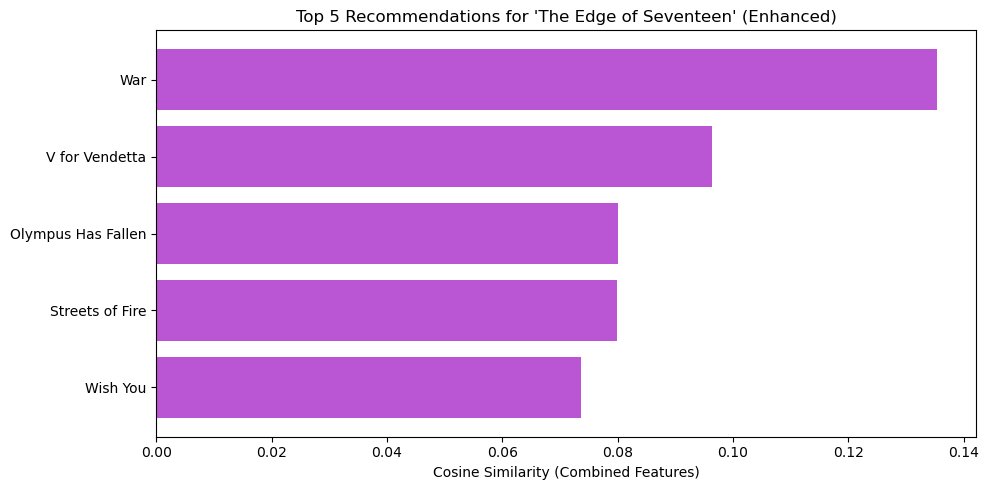

In [37]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Define a simple stopwords list
basic_stopwords = {
    'the', 'and', 'is', 'in', 'it', 'of', 'for', 'on', 'this', 'a', 'an',
    'with', 'to', 'as', 'by', 'at', 'from', 'that', 'or', 'be', 'are', 'about'
}

# Text cleaning function
def clean_text_basic(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in basic_stopwords]
    return ' '.join(words)

# Step 1: Combine features
netflix_cleaned['combined_text'] = (
    netflix_cleaned['description'].fillna('') + ' ' +
    netflix_cleaned['listed_in'].fillna('') + ' ' +
    netflix_cleaned['cast'].fillna('') + ' ' +
    netflix_cleaned['director'].fillna('')
)

# Step 2: Clean the combined text
netflix_cleaned['clean_combined_text'] = netflix_cleaned['combined_text'].apply(clean_text_basic)

# Step 3: TF-IDF vectorization
tfidf_combined = TfidfVectorizer(stop_words='english')
tfidf_matrix_combined = tfidf_combined.fit_transform(netflix_cleaned['clean_combined_text'])

# Step 4: Index map
title_to_index = pd.Series(netflix_cleaned.index, index=netflix_cleaned['title']).drop_duplicates()

# Step 5: Recommendation function (efficient)
def recommend_movies_combined_efficient(title, num_recommendations=5):
    if title not in title_to_index:
        return f"❌ '{title}' not found in the dataset."
    
    idx = title_to_index[title]
    sim_scores = linear_kernel(tfidf_matrix_combined[idx], tfidf_matrix_combined).flatten()
    top_indices = sim_scores.argsort()[-(num_recommendations + 1):][::-1][1:]
    
    recommended_titles = netflix_cleaned['title'].iloc[top_indices].tolist()
    recommended_scores = sim_scores[top_indices]
    
    return recommended_titles, recommended_scores

# Step 6: Visualize recommendations
title_test = "The Edge of Seventeen"  # Change this title to test others
recommended_titles_efficient, score_values = recommend_movies_combined_efficient(title_test, 5)

plt.figure(figsize=(10, 5))
plt.barh(recommended_titles_efficient, score_values, color='mediumorchid')
plt.xlabel('Cosine Similarity (Combined Features)')
plt.title(f"Top 5 Recommendations for '{title_test}' (Enhanced)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [38]:
# Step 2: Precision@5 using genre overlap
def precision_at_5_using_genres_safe(title):
    if title not in title_to_index:
        return None
    try:
        original_genres = set(netflix_cleaned.loc[title_to_index[title], 'listed_in'].split(', '))
        recommended, _ = recommend_movies_combined_efficient(title, 5)
        relevant = 0
        for rec_title in recommended:
            rec_idx = title_to_index.get(rec_title)
            if rec_idx is not None:
                rec_genres_raw = netflix_cleaned.loc[rec_idx, 'listed_in']
                if pd.notnull(rec_genres_raw):
                    rec_genres = set(rec_genres_raw.split(', '))
                    if original_genres.intersection(rec_genres):
                        relevant += 1
        return relevant / 5
    except Exception:
        return None

# Step 3: Evaluate Precision@5 on 10 random titles
sample_titles = netflix_cleaned['title'].drop_duplicates().sample(10, random_state=1).tolist()
precision_scores = {title: precision_at_5_using_genres_safe(title) for title in sample_titles}

# Step 4: Display results
precision_df = pd.DataFrame(list(precision_scores.items()), columns=["Title", "Precision@5"])
print(precision_df)
print("\nAverage Precision@5:", precision_df["Precision@5"].mean())

                               Title  Precision@5
0                                Hop          0.6
1                     Kanavu Variyam          NaN
2               SDU: Sex Duties Unit          0.0
3            The Squid and the Whale          0.8
4  Iliza Shlesinger: Confirmed Kills          NaN
5                  The Green Inferno          0.8
6                     Teen Aur Aadha          0.8
7                  Running for Grace          NaN
8                               I Am          NaN
9                             Mersal          1.0

Average Precision@5: 0.6666666666666666


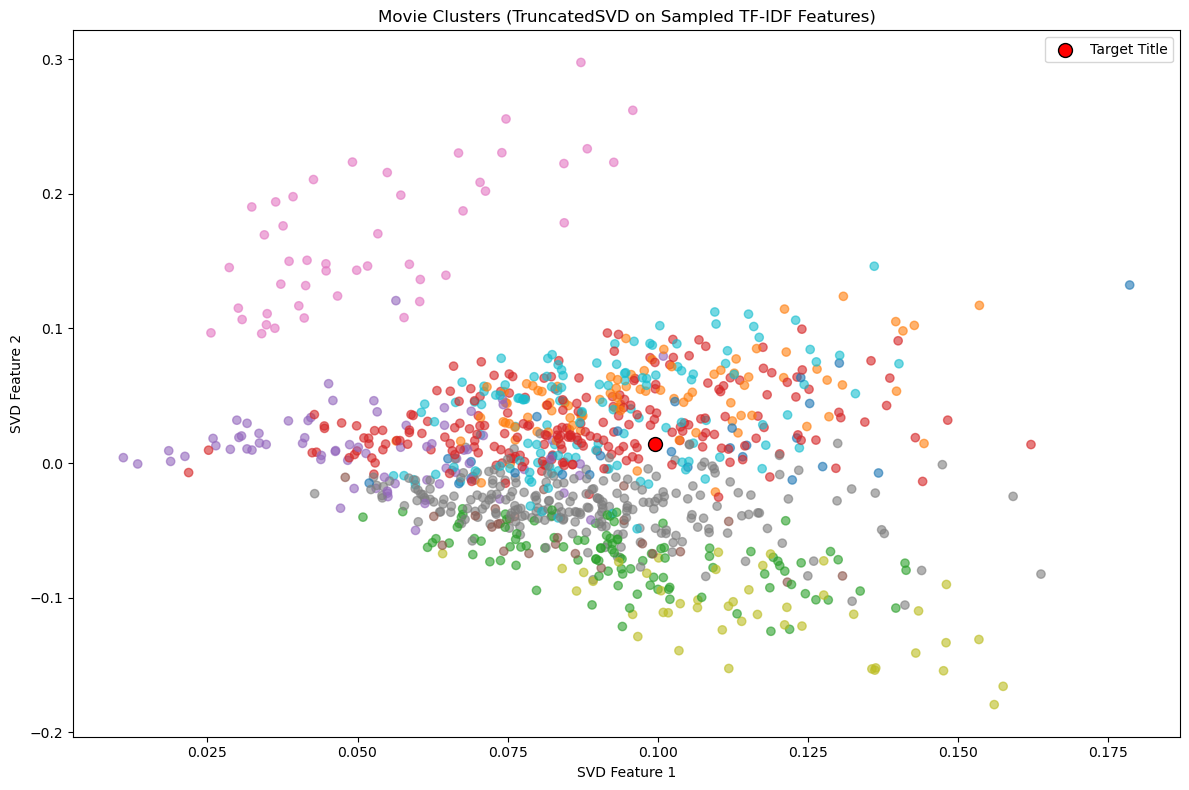

In [47]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD


netflix_cleaned = netflix_cleaned.reset_index(drop=True)

# Title-to-index map
title_to_index = pd.Series(netflix_cleaned.reset_index().index, index=netflix_cleaned['title']).drop_duplicates()

# --- Clustering + Visualization ---
# KMeans clustering
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
netflix_cleaned['cluster'] = kmeans.fit_predict(tfidf_matrix_combined)

# Sample for visualization
sampled_data = netflix_cleaned.sample(1000, random_state=42)
sample_indices = sampled_data.index
sample_tfidf = tfidf_matrix_combined[sample_indices]

# Truncated SVD for 2D projection
svd = TruncatedSVD(n_components=2, random_state=42)
svd_features = svd.fit_transform(sample_tfidf)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(svd_features[:, 0], svd_features[:, 1],
            c=sampled_data['cluster'], cmap='tab10', alpha=0.6)
plt.title("Movie Clusters (TruncatedSVD on Sampled TF-IDF Features)")
plt.xlabel("SVD Feature 1")
plt.ylabel("SVD Feature 2")

# Highlight target title and recommendations
target_title = "The Edge of Seventeen"
if target_title in title_to_index and title_to_index[target_title] in sample_indices:
    idx = title_to_index[target_title]
    rec_titles, _ = recommend_movies_combined_efficient(target_title, 5)
    rec_indices = [title_to_index[t] for t in rec_titles if t in title_to_index and title_to_index[t] in sample_indices]

    sample_idx_list = list(sample_indices)
    target_plot_idx = sample_idx_list.index(idx)

    # Highlight target
    plt.scatter(svd_features[target_plot_idx, 0], svd_features[target_plot_idx, 1],
                c='red', s=100, edgecolors='black', label='Target Title')

    # Highlight recommendations
    for rec_idx in rec_indices:
        rec_plot_idx = sample_idx_list.index(rec_idx)
        plt.scatter(svd_features[rec_plot_idx, 0], svd_features[rec_plot_idx, 1],
                    c='lime', s=100, edgecolors='black', label='Recommendation')

    # Clean up legend
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    plt.legend(unique_labels.values(), unique_labels.keys())

plt.tight_layout()
plt.show()


In [49]:
import pandas as pd
import random
from sklearn.metrics.pairwise import linear_kernel

# Step 1: Filter Indian movies
indian_movies = netflix_cleaned[netflix_cleaned['country'].str.contains("India", case=False, na=False)]

# Step 2: Get a clean list of unique titles with release year and type
indian_movies_list = indian_movies[['title', 'release_year', 'type']].drop_duplicates().sort_values(by='release_year', ascending=False)

# Step 3: Select a random Indian title
random_title = random.choice(indian_movies['title'].tolist())

# Step 4: Recommend similar movies (content-based)
def recommend_movies_combined_efficient(title, num_recommendations=5):
    if title not in title_to_index:
        return [], []
    idx = title_to_index[title]
    sim_scores = linear_kernel(tfidf_matrix_combined[idx], tfidf_matrix_combined).flatten()
    top_indices = sim_scores.argsort()[-(num_recommendations + 1):][::-1]
    top_indices = [i for i in top_indices if i != idx][:num_recommendations]
    recommended_titles = netflix_cleaned['title'].iloc[top_indices].tolist()
    recommended_scores = sim_scores[top_indices]
    return recommended_titles, recommended_scores

# Step 5: Run recommendations
recommended_titles, _ = recommend_movies_combined_efficient(random_title, 5)

# Output
print(f"\n🎬 Randomly Selected Indian Movie: {random_title}")
print("\n📽️ Top 5 Recommended Indian Movies:")
for i, title in enumerate(recommended_titles, 1):
    print(f"{i}. {title}")


🎬 Randomly Selected Indian Movie: My Brother ... Nikhil

📽️ Top 5 Recommended Indian Movies:
1. I Am
2. Heroine
3. Luck by Chance
4. Jhankaar Beats
5. Jal


In [51]:
import pickle
import os

# Create directory to store models if it doesn't exist
os.makedirs("model_assets", exist_ok=True)

# Step 1: Save cleaned DataFrame
with open("model_assets/netflix_cleaned.pkl", "wb") as f:
    pickle.dump(netflix_cleaned, f)

# Step 2: Save TF-IDF vectorizer
with open("model_assets/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_combined, f)

# Step 3: Save TF-IDF matrix
with open("model_assets/tfidf_matrix.pkl", "wb") as f:
    pickle.dump(tfidf_matrix_combined, f)

# Step 4: Save title-to-index map
with open("model_assets/title_to_index.pkl", "wb") as f:
    pickle.dump(title_to_index, f)

"✅ All model components saved in 'model_assets/' directory."


"✅ All model components saved in 'model_assets/' directory."